# **Library Import**

In [ ]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import lightgbm as lgb

import keras 
from keras.layers import *
from keras.optimizers import *
from keras.models import Model

from sklearn.metrics import f1_score 
from sklearn.model_selection import KFold

In [ ]:
# allow multiple outputs
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

# display all columns
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

#Plot Templates
plt.style.use('seaborn-dark-palette')
plt.rcParams['figure.figsize'] = (25, 25)

# supresses warming messages
warnings.filterwarnings('ignore')

# **Load Dataset & Preprocessing**

In [ ]:
#Load Dataset
training_x = pd.read_csv('train_values.csv')
training_y = pd.read_csv('train_labels.csv')
test_value = pd.read_csv('test_values.csv')

In [ ]:
training_x.shape[0]

260601

In [ ]:
training_y.shape[0]

260601

***Merge Files***

In [ ]:
training_merge = pd.merge(training_x, training_y, how='inner', on='building_id')

In [ ]:
training_merge.shape[0]

260601

In [ ]:
#check for duplicates
training_merge.duplicated().sum()
print('\n')
training_merge.columns.duplicated().sum()

0

In [ ]:
#check test value for duplicates
test_value.duplicated().sum()
print('\n')
test_value.columns.duplicated().sum()

0

In [ ]:
#reset index
training_merge = training_merge.set_index('building_id')
test_value = test_value.set_index('building_id')
training_merge

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
training_merge.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
training_merge.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
training_merge.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
     

In [ ]:
#explore dataset shape
print(training_merge.shape)
print(test_value.shape)

(260601, 39)
(86868, 38)


In [ ]:
#Type of Variables
training_merge.info

<bound method DataFrame.info of              geo_level_1_id  ...  damage_grade
building_id                  ...              
802906                    6  ...             3
28830                     8  ...             2
94947                    21  ...             3
590882                   22  ...             2
201944                   11  ...             3
...                     ...  ...           ...
688636                   25  ...             2
669485                   17  ...             3
602512                   17  ...             3
151409                   26  ...             2
747594                   21  ...             3

[260601 rows x 39 columns]>

In [ ]:
#Data types
training_merge.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

In [ ]:
#show unique values in each column
training_merge.nunique()

geo_level_1_id                               31
geo_level_2_id                             1414
geo_level_3_id                            11595
count_floors_pre_eq                           9
age                                          42
area_percentage                              84
height_percentage                            27
land_surface_condition                        3
foundation_type                               5
roof_type                                     3
ground_floor_type                             5
other_floor_type                              4
position                                      4
plan_configuration                           10
has_superstructure_adobe_mud                  2
has_superstructure_mud_mortar_stone           2
has_superstructure_stone_flag                 2
has_superstructure_cement_mortar_stone        2
has_superstructure_mud_mortar_brick           2
has_superstructure_cement_mortar_brick        2
has_superstructure_timber               

In [ ]:
training_merge.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
#Check object columns
mylist = list(training_merge.select_dtypes(include = ['object']).columns)
mylist

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [ ]:
len(mylist)

8

# **EDA & Data Cleanup**

In [ ]:
#training_merge split
training_x = training_merge.iloc[:,:-1]
training_y = training_merge.iloc[:,-1:]
training_x
training_y

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3
...,...
688636,2
669485,3
602512,3


In [ ]:
#dataframe check
type(training_x)
type(training_y)

pandas.core.frame.DataFrame

In [ ]:
#check for missing values
missing = training_merge.isna().sum().sort_values(ascending=False)
missing

damage_grade                              0
roof_type                                 0
has_superstructure_stone_flag             0
has_superstructure_mud_mortar_stone       0
has_superstructure_adobe_mud              0
plan_configuration                        0
position                                  0
other_floor_type                          0
ground_floor_type                         0
foundation_type                           0
has_superstructure_mud_mortar_brick       0
land_surface_condition                    0
height_percentage                         0
area_percentage                           0
age                                       0
count_floors_pre_eq                       0
geo_level_3_id                            0
geo_level_2_id                            0
has_superstructure_cement_mortar_stone    0
has_superstructure_cement_mortar_brick    0
has_secondary_use_other                   0
has_secondary_use_hotel                   0
has_secondary_use_use_police    

In [ ]:
#check for test value missing values
missing_test = test_value.isna().sum().sort_values(ascending=False)
missing_test

has_secondary_use_other                   0
roof_type                                 0
has_superstructure_stone_flag             0
has_superstructure_mud_mortar_stone       0
has_superstructure_adobe_mud              0
plan_configuration                        0
position                                  0
other_floor_type                          0
ground_floor_type                         0
foundation_type                           0
has_secondary_use_use_police              0
land_surface_condition                    0
height_percentage                         0
area_percentage                           0
age                                       0
count_floors_pre_eq                       0
geo_level_3_id                            0
geo_level_2_id                            0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_secondary_use_gov_office    

# **Correlation**

In [ ]:
#calculate correlations
corr = training_merge.corr()
corr

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
geo_level_1_id,1.000000,-0.061405,0.002718,-0.089364,-0.003908,0.071158,-0.063474,-0.018245,-0.152038,0.007677,0.023656,-0.028854,0.134121,0.144985,0.074169,0.016454,0.015767,0.022670,0.035108,-0.010428,-0.019786,0.001911,0.023523,0.003700,0.002977,0.002655,-0.002303,0.001060,0.000523,-0.017992,-0.072347
geo_level_2_id,-0.061405,1.000000,0.000921,0.047730,0.012594,-0.049443,0.035516,0.015833,0.076491,-0.008743,-0.009122,0.014246,-0.079875,-0.023927,-0.032588,-0.038173,-0.036074,-0.020144,-0.012439,-0.001519,0.017522,-0.008439,-0.030704,-0.004840,-0.004856,0.000687,-0.000757,-0.000152,0.001926,-0.013068,0.043161
geo_level_3_id,0.002718,0.000921,1.000000,-0.021646,-0.006385,-0.005643,-0.024507,-0.015732,0.026294,0.019579,0.005966,-0.023278,-0.005116,-0.003916,0.006143,0.002265,-0.012420,-0.010604,-0.002479,0.007375,0.015995,-0.002001,-0.007356,-0.007058,-0.004373,-0.000862,-0.002632,-0.000943,0.000269,-0.002463,0.007932
count_floors_pre_eq,-0.089364,0.047730,-0.021646,1.000000,0.086668,0.101071,0.772734,0.174852,-0.027116,-0.041058,-0.011329,0.257279,-0.085821,-0.056637,-0.070487,0.007448,0.049000,-0.029888,0.086586,0.052125,-0.005294,0.077120,0.035425,0.016384,0.008833,-0.002611,0.006786,0.009639,0.003939,-0.002073,0.122308
age,-0.003908,0.012594,-0.006385,0.086668,1.000000,-0.004323,0.061074,0.068032,0.001321,0.009129,-0.012128,0.079525,-0.036992,0.005855,-0.008374,-0.025431,-0.025552,-0.001520,0.005309,-0.008788,-0.002194,-0.010021,0.001193,-0.004189,-0.003514,-0.003658,-0.002169,-0.001764,-0.001195,-0.004534,0.029273
area_percentage,0.071158,-0.049443,-0.005643,0.101071,-0.004323,1.000000,0.196645,0.026287,-0.225541,-0.000473,0.073701,0.053362,0.210800,-0.053965,-0.031641,0.185047,0.224647,0.007928,0.088630,0.122401,-0.016478,0.159885,0.105983,0.052212,0.050164,0.019421,0.015109,0.015290,0.004983,0.013111,-0.125221
height_percentage,-0.063474,0.035516,-0.024507,0.772734,0.061074,0.196645,1.000000,0.149725,-0.106573,-0.020260,0.012960,0.209098,0.001698,-0.052402,-0.063342,0.086228,0.129698,-0.019266,0.064316,0.091780,-0.005390,0.123551,0.068909,0.031366,0.020032,0.001946,0.011192,0.014660,0.004048,0.005397,0.048130
has_superstructure_adobe_mud,-0.018245,0.015833,-0.015732,0.174852,0.068032,0.026287,0.149725,1.000000,-0.306861,0.006962,-0.014554,0.314979,-0.037549,0.011694,0.011528,-0.036830,-0.036782,0.057545,0.033068,-0.013300,-0.003917,-0.012642,-0.003935,-0.004281,-0.002369,0.001762,-0.003292,-0.002648,-0.001493,-0.010074,0.055314
has_superstructure_mud_mortar_stone,-0.152038,0.076491,0.026294,-0.027116,0.001321,-0.225541,-0.106573,-0.306861,1.000000,-0.034046,-0.104288,-0.376208,-0.470715,-0.040177,-0.054657,-0.222366,-0.224509,-0.041705,0.001576,-0.087520,0.058261,-0.159532,-0.117948,-0.036064,-0.023070,-0.025507,-0.008763,-0.011904,-0.003380,0.005628,0.291325
has_superstructure_stone_flag,0.007677,-0.008743,0.019579,-0.041058,0.009129,-0.000473,-0.020260,0.006962,-0.034046,1.000000,0.037307,-0.033348,-0.043729,0.125311,0.078466,0.008448,-0.021406,0.065732,0.004564,-0.001738,0.010563,-0.008868,-0.011632,-0.000971,-0.001362,-0.004240,-0.002586,0.002959,0.000472,0.002127,0.066039


In [ ]:
#get list of correlation with the target & rest of features
corr_target = corr['damage_grade'].sort_values(ascending=False)
corr_target

damage_grade                              1.000000
has_superstructure_mud_mortar_stone       0.291325
count_floors_pre_eq                       0.122308
has_superstructure_stone_flag             0.066039
count_families                            0.056151
has_superstructure_adobe_mud              0.055314
height_percentage                         0.048130
geo_level_2_id                            0.043161
age                                       0.029273
has_superstructure_mud_mortar_brick       0.014561
has_secondary_use_agriculture             0.011309
geo_level_3_id                            0.007932
has_secondary_use_use_police             -0.001656
has_secondary_use_health_post            -0.008543
has_secondary_use_gov_office             -0.009378
has_secondary_use_industry               -0.011024
has_secondary_use_school                 -0.011692
has_secondary_use_other                  -0.016334
has_secondary_use_institution            -0.028728
has_superstructure_other       

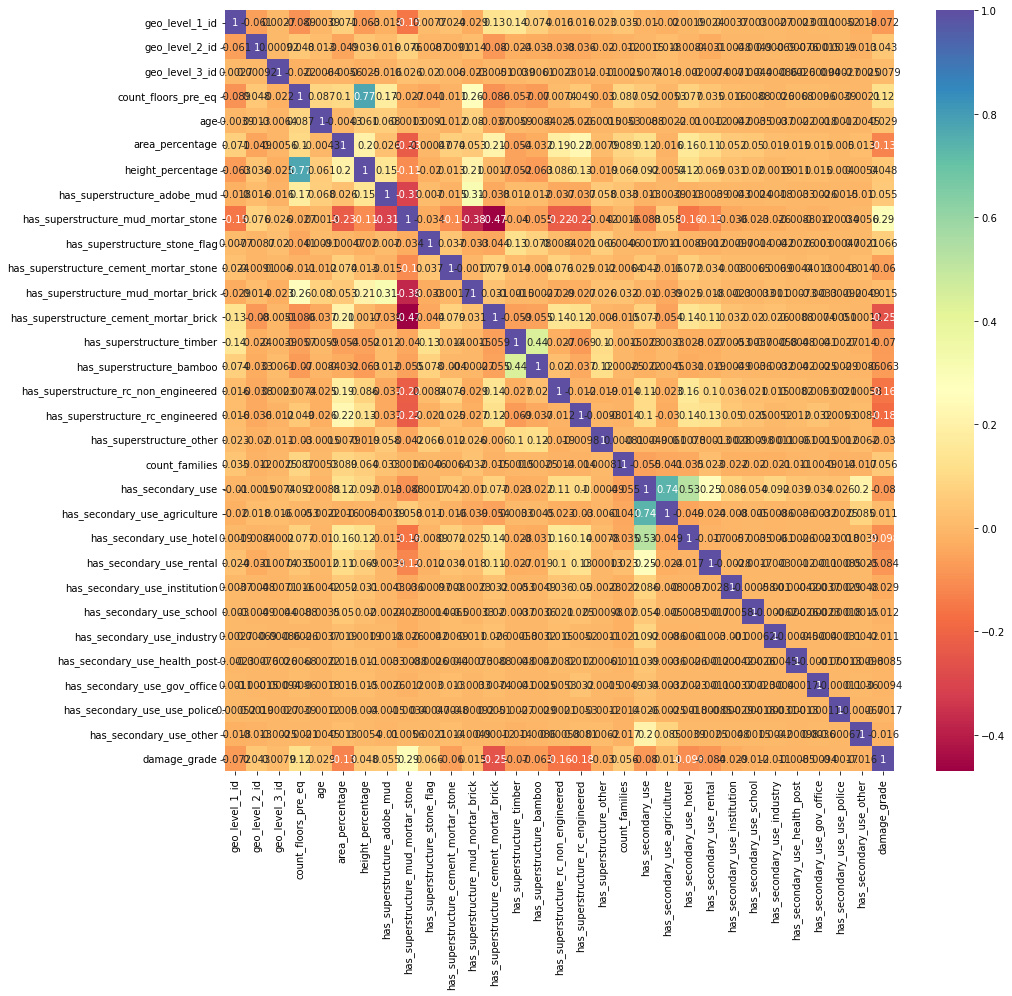

In [ ]:
plt.figure(figsize=(15,14))
sns.heatmap(training_merge.corr(), annot=True, cmap='Spectral');
plt.show();

# **Target Y Imbalance Check**

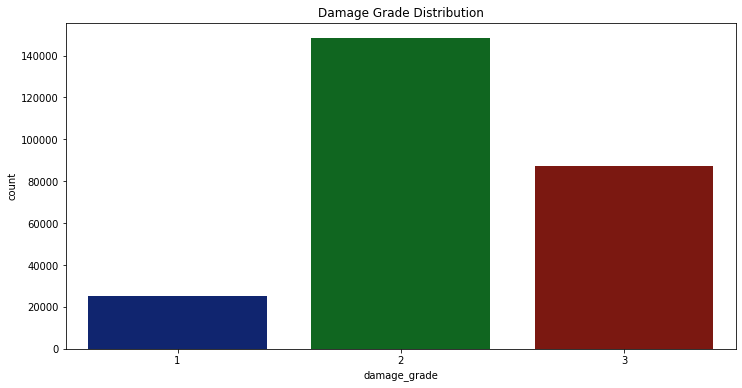

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="damage_grade", data=training_merge);
plt.title("Damage Grade Distribution");
plt.show();

In [ ]:
# check the actual counts
training_merge['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

# **Data Ploting & Preprocessing**

***- Numeric Ploting***

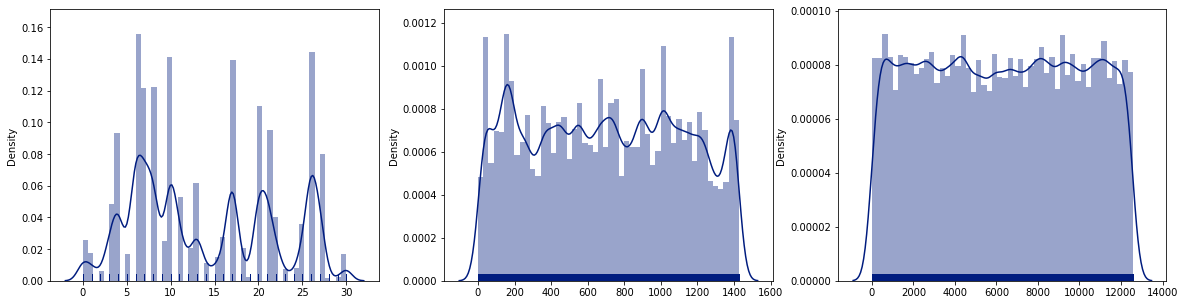

In [ ]:
fig, axes = plt.subplots(ncols = 3, figsize = (20, 5))
sns.distplot(x=training_merge['geo_level_1_id'], rug=True, ax = axes[0]);
sns.distplot(x=training_merge['geo_level_2_id'], rug=True, ax = axes[1]);
sns.distplot(x=training_merge['geo_level_3_id'], rug=True, ax = axes[2]);
#May need normalize

In [ ]:
#geo1_max = training_merge['geo_level_1_id'].max()
#geo2_max = training_merge['geo_level_2_id'].max()
#geo3_max = training_merge['geo_level_3_id'].max()

In [ ]:
# Normalized & scaled Training data
#training_merge['geo_level_1_id'] = training_merge['geo_level_1_id'] / geo1_max
#training_merge['geo_level_2_id'] = training_merge['geo_level_2_id'] / geo2_max
#training_merge['geo_level_3_id'] = training_merge['geo_level_3_id'] / geo3_max

In [ ]:
'''
# Normalized & scaled Testing data
test_value['geo_level_1_id'] = test_value['geo_level_1_id'] / geo1_max
test_value['geo_level_2_id'] = test_value['geo_level_2_id'] / geo2_max
test_value['geo_level_3_id'] = test_value['geo_level_3_id'] / geo3_max
'''

"\n# Normalized & scaled Testing data\ntest_value['geo_level_1_id'] = test_value['geo_level_1_id'] / geo1_max\ntest_value['geo_level_2_id'] = test_value['geo_level_2_id'] / geo2_max\ntest_value['geo_level_3_id'] = test_value['geo_level_3_id'] / geo3_max\n"

In [ ]:
'''
fig, axes = plt.subplots(ncols = 3, figsize = (20, 5))
sns.distplot(x=training_merge['geo_level_1_id'], rug=True, ax = axes[0]);
sns.distplot(x=training_merge['geo_level_2_id'], rug=True, ax = axes[1]);
sns.distplot(x=training_merge['geo_level_3_id'], rug=True, ax = axes[2]);
'''

"\nfig, axes = plt.subplots(ncols = 3, figsize = (20, 5))\nsns.distplot(x=training_merge['geo_level_1_id'], rug=True, ax = axes[0]);\nsns.distplot(x=training_merge['geo_level_2_id'], rug=True, ax = axes[1]);\nsns.distplot(x=training_merge['geo_level_3_id'], rug=True, ax = axes[2]);\n"

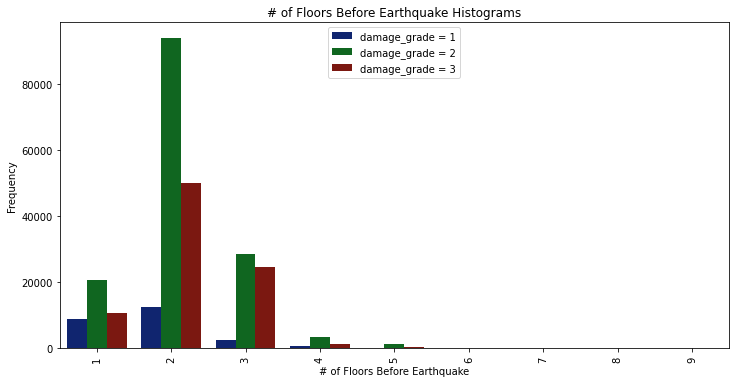

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=training_merge["count_floors_pre_eq"], hue=training_merge["damage_grade"]);
plt.ylabel("Frequency");
plt.xlabel("# of Floors Before Earthquake");
plt.xticks(rotation=90);
plt.title("# of Floors Before Earthquake Histograms");
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"]);
plt.show();

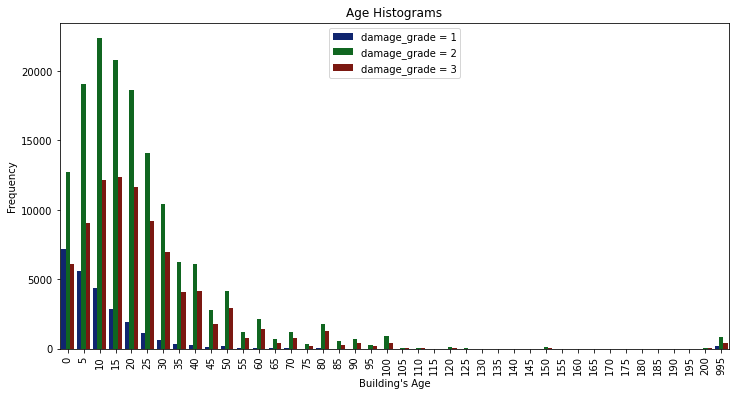

In [ ]:
# will need to take care of outliers
plt.figure(figsize=(12,6))
sns.countplot(x=training_merge["age"],hue=training_merge["damage_grade"]);
plt.ylabel("Frequency");
plt.xlabel("Building's Age");
plt.xticks(rotation=90);
plt.title("Age Histograms");
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"]);
plt.show();

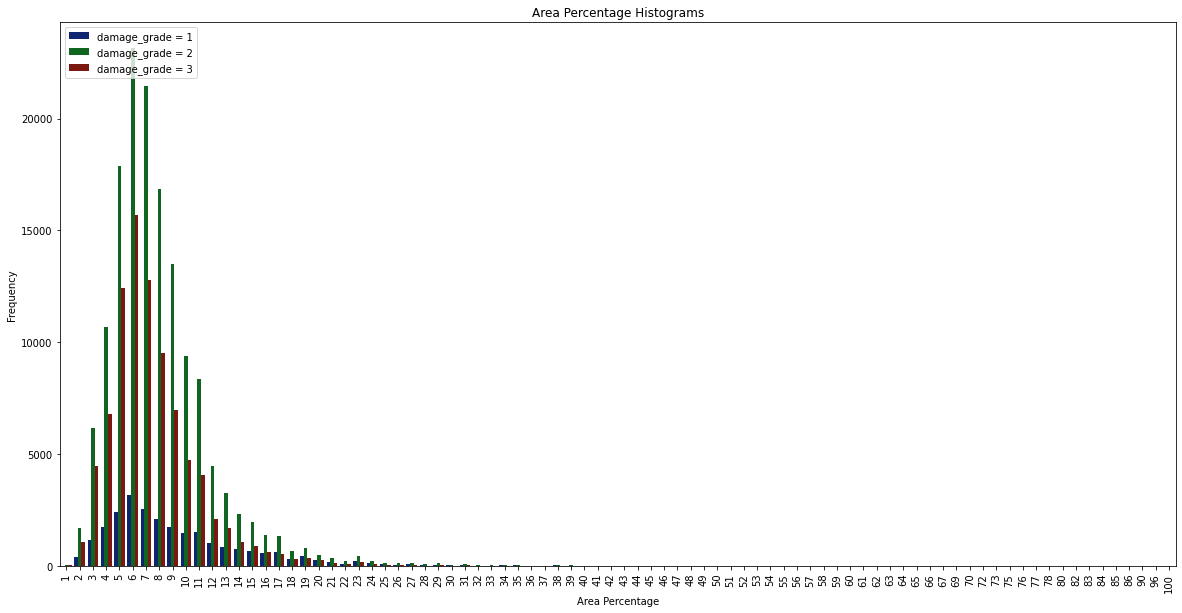

In [ ]:
# will need to take care of outliers
plt.figure(figsize=(20,10))
sns.countplot(x=training_merge["area_percentage"],hue=training_merge["damage_grade"]);
plt.ylabel("Frequency");
plt.xlabel("Area Percentage");
plt.xticks(rotation=90);
plt.title("Area Percentage Histograms");
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"]);
plt.show();

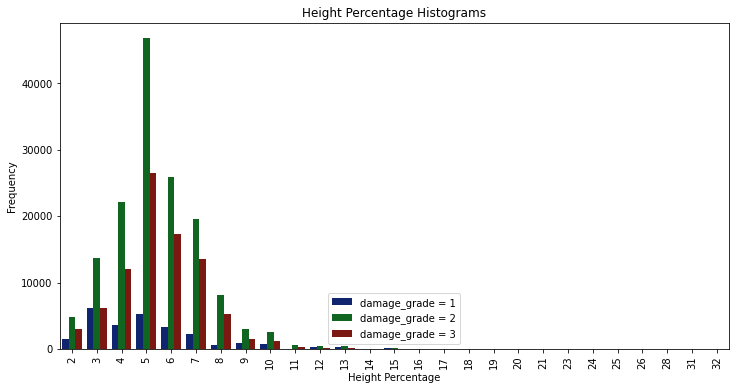

In [ ]:
# will need to take care of outliers
plt.figure(figsize=(12,6))
sns.countplot(x=training_merge["height_percentage"],hue=training_merge["damage_grade"]);
plt.ylabel("Frequency");
plt.xlabel("Height Percentage");
plt.xticks(rotation=90);
plt.title("Height Percentage Histograms");
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"]);
plt.show();

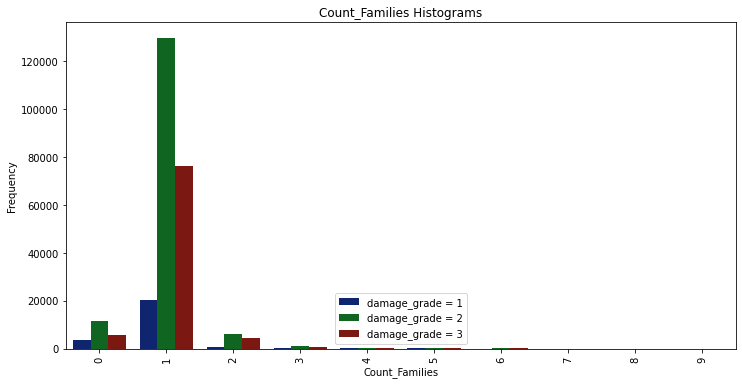

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=training_merge["count_families"],hue=training_merge["damage_grade"]);
plt.ylabel("Frequency");
plt.xlabel("Count_Families");
plt.xticks(rotation=90);
plt.title("Count_Families Histograms");
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"]);
plt.show();

***- Categorical Ploting***

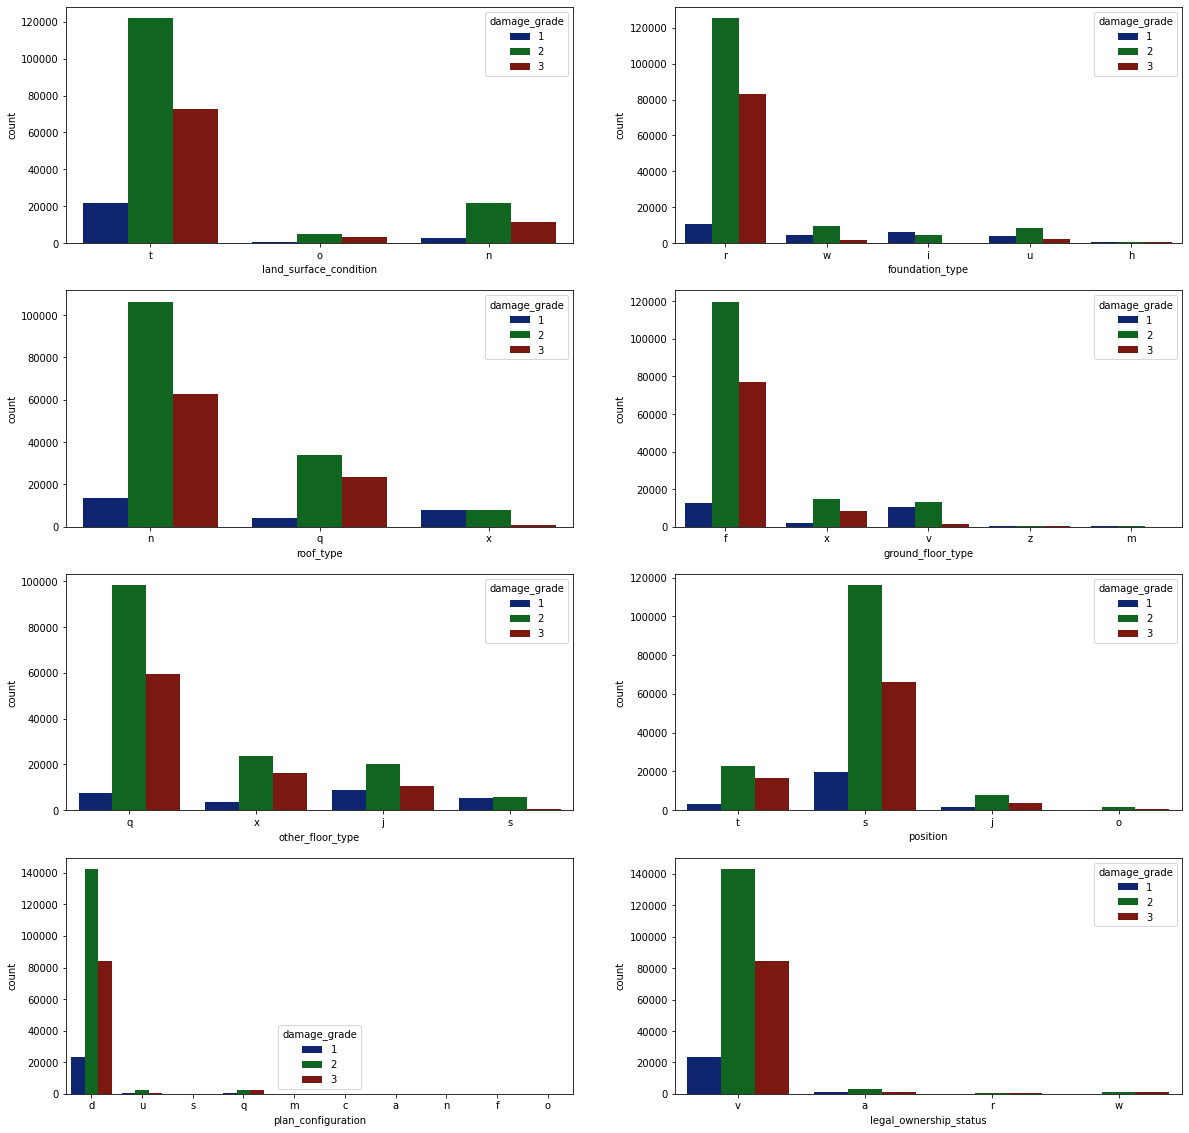

In [ ]:
#categorical variable plot
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (20, 20))
sns.countplot(x=training_merge['land_surface_condition'], hue = training_merge['damage_grade'], ax = axes[0][0]);
sns.countplot(x=training_merge['foundation_type'], hue = training_merge['damage_grade'], ax = axes[0][1]);
sns.countplot(x=training_merge['roof_type'], hue = training_merge['damage_grade'], ax = axes[1][0]);
sns.countplot(x=training_merge['ground_floor_type'], hue = training_merge['damage_grade'], ax = axes[1][1]);
sns.countplot(x=training_merge['other_floor_type'], hue = training_merge['damage_grade'], ax = axes[2][0]);
sns.countplot(x=training_merge['position'], hue = training_merge['damage_grade'], ax = axes[2][1]);
sns.countplot(x=training_merge['plan_configuration'], hue = training_merge['damage_grade'], ax = axes[3][0]);
sns.countplot(x=training_merge['legal_ownership_status'], hue = training_merge['damage_grade'], ax = axes[3][1]);

***-Binary Ploting***

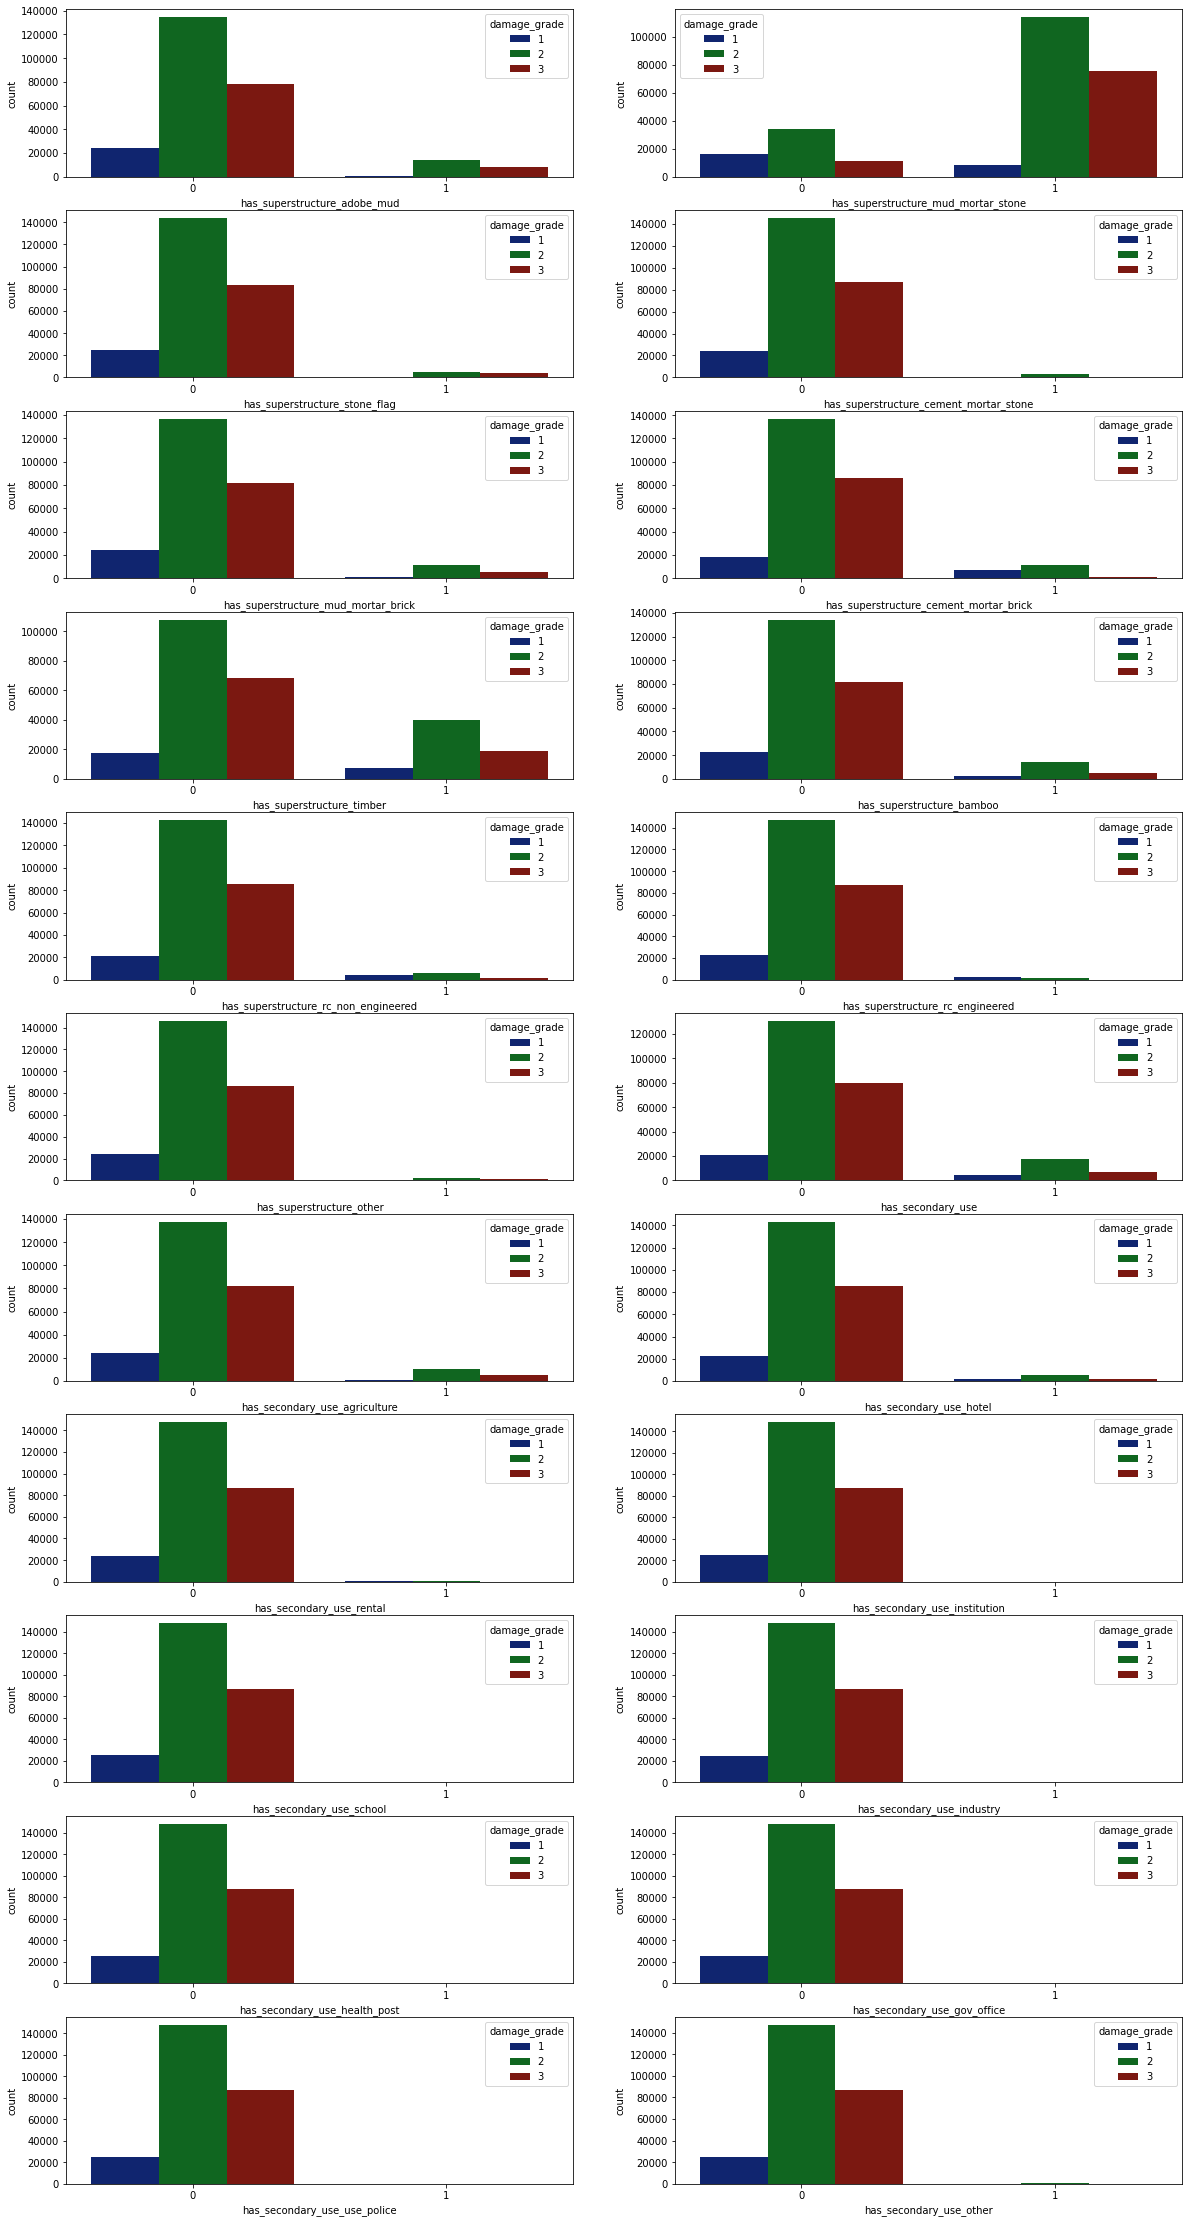

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 11, figsize = (20, 40))
sns.countplot(x=training_merge['has_superstructure_adobe_mud'], hue = training_merge['damage_grade'], ax = axes[0][0]);
sns.countplot(x=training_merge['has_superstructure_mud_mortar_stone'], hue = training_merge['damage_grade'], ax = axes[0][1]);
sns.countplot(x=training_merge['has_superstructure_stone_flag'], hue = training_merge['damage_grade'], ax = axes[1][0]);
sns.countplot(x=training_merge['has_superstructure_cement_mortar_stone'], hue = training_merge['damage_grade'], ax = axes[1][1]);
sns.countplot(x=training_merge['has_superstructure_mud_mortar_brick'], hue = training_merge['damage_grade'], ax = axes[2][0]);
sns.countplot(x=training_merge['has_superstructure_cement_mortar_brick'], hue = training_merge['damage_grade'], ax = axes[2][1]);
sns.countplot(x=training_merge['has_superstructure_timber'], hue = training_merge['damage_grade'], ax = axes[3][0]);
sns.countplot(x=training_merge['has_superstructure_bamboo'], hue = training_merge['damage_grade'], ax = axes[3][1]);
sns.countplot(x=training_merge['has_superstructure_rc_non_engineered'], hue = training_merge['damage_grade'], ax = axes[4][0]);
sns.countplot(x=training_merge['has_superstructure_rc_engineered'], hue = training_merge['damage_grade'], ax = axes[4][1]);
sns.countplot(x=training_merge['has_superstructure_other'], hue = training_merge['damage_grade'], ax = axes[5][0]);
sns.countplot(x=training_merge['has_secondary_use'], hue = training_merge['damage_grade'], ax = axes[5][1]);
sns.countplot(x=training_merge['has_secondary_use_agriculture'], hue = training_merge['damage_grade'], ax = axes[6][0]);
sns.countplot(x=training_merge['has_secondary_use_hotel'], hue = training_merge['damage_grade'], ax = axes[6][1]);
sns.countplot(x=training_merge['has_secondary_use_rental'], hue = training_merge['damage_grade'], ax = axes[7][0]);
sns.countplot(x=training_merge['has_secondary_use_institution'], hue = training_merge['damage_grade'], ax = axes[7][1]);
sns.countplot(x=training_merge['has_secondary_use_school'], hue = training_merge['damage_grade'], ax = axes[8][0]);
sns.countplot(x=training_merge['has_secondary_use_industry'], hue = training_merge['damage_grade'], ax = axes[8][1]);
sns.countplot(x=training_merge['has_secondary_use_health_post'], hue = training_merge['damage_grade'], ax = axes[9][0]);
sns.countplot(x=training_merge['has_secondary_use_gov_office'], hue = training_merge['damage_grade'], ax = axes[9][1]);
sns.countplot(x=training_merge['has_secondary_use_use_police'], hue = training_merge['damage_grade'], ax = axes[10][0]);
sns.countplot(x=training_merge['has_secondary_use_other'], hue = training_merge['damage_grade'], ax = axes[10][1]);

In [ ]:
# fimportance = main_rmc_model["model"].feature_importances_
# fimportance_df = pd.training_merge()
# fimportance_df.loc[:, "f_imp"] = fimportance
# fimportance_df.loc[:, "col"] = training_merge.columns
# fimportance_df.sort_values(by="f_imp", ascending=False, inplace=True)
# fig, ax = plt.subplots(1, 1, figsize=(12, 24))
# ax = sns.barplot(x="f_imp", y="col",
#                 data=fimportance_df,
#                 palette="GnBu_d")
# ax.tick_params(axis="both", which="major", labelsize=20)
# ax.set_xlabel("Feature Importance in %", fontsize=24)
# ax.set_ylabel("Features", fontsize=24)
# path = (r"{}\feature_importance.png".format(output_path))
# fig.savefig(path, bbox_inches='tight')

# ***Geo Feature Engineering***

In [ ]:
geo1 = np.array(pd.get_dummies(pd.concat([training_x["geo_level_1_id"], test_value["geo_level_1_id"]])))
geo2 = np.array(pd.get_dummies(pd.concat([training_x["geo_level_2_id"], test_value["geo_level_2_id"]])))
geo3 = np.array(pd.get_dummies(pd.concat([training_x["geo_level_3_id"], test_value["geo_level_3_id"]])))

In [ ]:
def NET():
    inp = Input((geo3.shape[1],))
    i1 = Dense(16, name="intermediate")(inp)
    x2 = Dense(geo2.shape[1], activation='sigmoid')(i1)
    x1 = Dense(geo1.shape[1], activation='sigmoid')(i1)

    model = Model(inp, [x2,x1])
    model.compile(loss="binary_crossentropy", optimizer="adam")
    return model

In [ ]:
model = NET()
model.fit(geo3, [geo2, geo1], batch_size=128, epochs=10, verbose=2)
model.save("geo_embed.h5")

Epoch 1/10
2715/2715 - 44s - loss: 0.2056 - dense_loss: 0.0532 - dense_1_loss: 0.1524 - 44s/epoch - 16ms/step
Epoch 2/10
2715/2715 - 43s - loss: 0.0544 - dense_loss: 0.0052 - dense_1_loss: 0.0493 - 43s/epoch - 16ms/step
Epoch 3/10
2715/2715 - 43s - loss: 0.0148 - dense_loss: 0.0042 - dense_1_loss: 0.0106 - 43s/epoch - 16ms/step
Epoch 4/10
2715/2715 - 45s - loss: 0.0068 - dense_loss: 0.0035 - dense_1_loss: 0.0033 - 45s/epoch - 17ms/step
Epoch 5/10
2715/2715 - 46s - loss: 0.0044 - dense_loss: 0.0030 - dense_1_loss: 0.0014 - 46s/epoch - 17ms/step
Epoch 6/10
2715/2715 - 45s - loss: 0.0030 - dense_loss: 0.0024 - dense_1_loss: 6.4002e-04 - 45s/epoch - 17ms/step
Epoch 7/10
2715/2715 - 46s - loss: 0.0020 - dense_loss: 0.0017 - dense_1_loss: 3.3605e-04 - 46s/epoch - 17ms/step
Epoch 8/10
2715/2715 - 46s - loss: 0.0013 - dense_loss: 0.0011 - dense_1_loss: 1.7875e-04 - 46s/epoch - 17ms/step
Epoch 9/10
2715/2715 - 46s - loss: 8.3767e-04 - dense_loss: 7.4156e-04 - dense_1_loss: 9.6109e-05 - 46s/epoc

In [ ]:
# Load GEO-Embed Model
model = NET()
model.load_weights("geo_embed.h5")

In [ ]:
# "Extract Intermediate Layer" Function
from keras import backend as K

get_int_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])

In [ ]:
# Extract GEO-Embeds for all train data points.
# Then assign with train_data

out = []
for dat in geo3[:260601]:
    layer_output = get_int_layer_output(np.array([dat]))[0]
    out.append(layer_output)

out = np.array(out)
out = np.squeeze(out)

train_data = pd.get_dummies(training_x.copy())
train_data = train_data.drop(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'], axis=1)
train_data = train_data.assign(geo_feat1=out[:,0],
                               geo_feat2=out[:,1],
                               geo_feat3=out[:,2],  
                               geo_feat4=out[:,3],
                               geo_feat5=out[:,4],    
                               geo_feat6=out[:,5],
                               geo_feat7=out[:,6],
                               geo_feat8=out[:,7],
                               geo_feat9=out[:,8],
                               geo_feat10=out[:,9],
                               geo_feat11=out[:,10],
                               geo_feat12=out[:,11],
                               geo_feat13=out[:,12],
                               geo_feat14=out[:,13],
                               geo_feat15=out[:,14],           
                               geo_feat16=out[:,15])

In [ ]:
train_data.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,...,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,geo_feat1,geo_feat2,geo_feat3,geo_feat4,geo_feat5,geo_feat6,geo_feat7,geo_feat8,geo_feat9,geo_feat10,geo_feat11,geo_feat12,geo_feat13,geo_feat14,geo_feat15,geo_feat16
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.713477,-1.685749,-1.194371,2.408162,0.215208,-1.325237,-2.592249,-0.067111,0.658350,0.964602,-1.276430,1.157120,-2.049538,-1.843554,1.354692,-0.590274
28830,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.311378,-1.488049,-0.145316,0.842827,-0.709803,-1.263341,-1.929573,1.120080,0.191057,1.758695,-1.552979,-1.307747,-1.636067,-0.559708,0.878221,-0.211915
94947,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.501885,-1.405468,-1.775655,1.450704,-0.642247,-2.446310,0.938528,-0.374810,-1.954872,-0.765810,-2.463618,-1.697670,-1.982338,-1.335037,1.747809,-0.799202
590882,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.070153,0.202311,-2.107500,1.419313,-1.268123,-0.133942,-2.257814,0.861477,-1.968472,1.635222,0.358740,-0.218387,-1.695522,-2.057333,0.506888,-1.211981
201944,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.227016,0.134693,-1.647378,2.225381,-1.263988,-2.644835,0.787446,-0.299297,-1.737736,2.293003,-1.519499,0.510824,-0.183931,-2.308106,1.972746,-1.442366


In [ ]:
train_data.columns

Index(['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'land_surface_condition_n',
       'land_surface_condition_o', 'land_surface_condition_t',
       'fo

In [ ]:
# Extract GEO-Embeds for all test data points.
# Then assign with test_data

out = []
for dat in geo3[260601:]:
    layer_output = get_int_layer_output(np.array([dat]))[0]
    out.append(layer_output)

out = np.array(out)
out = np.squeeze(out)

test_data = pd.get_dummies(test_value.copy())
test_data = test_data.drop(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'], axis=1)
test_data = test_data.assign(geo_feat1=out[:,0],
                             geo_feat2=out[:,1],
                             geo_feat3=out[:,2],  
                             geo_feat4=out[:,3],
                             geo_feat5=out[:,4],    
                             geo_feat6=out[:,5],
                             geo_feat7=out[:,6],
                             geo_feat8=out[:,7],
                             geo_feat9=out[:,8],
                             geo_feat10=out[:,9],
                             geo_feat11=out[:,10],
                             geo_feat12=out[:,11],
                             geo_feat13=out[:,12],
                             geo_feat14=out[:,13],
                             geo_feat15=out[:,14],           
                             geo_feat16=out[:,15])

In [ ]:
test_data.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,...,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,geo_feat1,geo_feat2,geo_feat3,geo_feat4,geo_feat5,geo_feat6,geo_feat7,geo_feat8,geo_feat9,geo_feat10,geo_feat11,geo_feat12,geo_feat13,geo_feat14,geo_feat15,geo_feat16
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300051,3,20,7,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.178487,-1.174753,-0.519281,1.139457,-0.497142,-2.268867,0.009943,-0.742669,0.019291,1.415935,-0.724983,-1.164149,-0.652515,0.092306,0.537613,-1.243240
99355,2,25,13,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.308037,-1.629814,-1.594685,0.734262,0.739033,-0.678886,-1.084093,0.462104,-0.091534,0.054924,-1.776470,-0.378427,-1.028641,-1.427612,0.774286,-0.558690
890251,2,5,4,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-0.229437,-0.308185,-1.173216,0.463355,-0.883243,-0.681270,-1.571340,0.182869,-1.444597,1.457899,-0.318530,0.213304,-0.615155,-1.458455,-0.154438,-0.115178
745817,1,0,19,3,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-2.131380,-2.538512,-0.067039,-0.130441,-1.162298,-2.971518,-1.316206,-2.259534,-1.623259,2.967144,-1.663971,-0.500975,-2.782735,-1.430148,-1.786694,-1.264018
421793,3,15,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-0.908015,-1.129179,-0.531318,1.829534,-0.896296,-2.257983,0.242262,-0.621322,-0.504734,1.658621,-0.004866,-1.175617,0.233338,-0.349680,0.767912,-0.528235


In [ ]:
test_data.columns

Index(['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'land_surface_condition_n',
       'land_surface_condition_o', 'land_surface_condition_t',
       'fo

# **Age Feature Engineering**

In [ ]:
train_data.loc[train_data['age']<20,'age'] = 0
train_data.loc[(train_data['age']>=20) & (train_data['age']<40),'age'] =1
train_data.loc[(train_data['age']>=40) & (train_data['age']<60),'age'] =2
train_data.loc[(train_data['age']>=60) & (train_data['age']<80),'age'] =3
train_data.loc[train_data['age']>=80,'age'] =4

In [ ]:
train_data.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,...,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,geo_feat1,geo_feat2,geo_feat3,geo_feat4,geo_feat5,geo_feat6,geo_feat7,geo_feat8,geo_feat9,geo_feat10,geo_feat11,geo_feat12,geo_feat13,geo_feat14,geo_feat15,geo_feat16
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,2,1,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.713477,-1.685749,-1.194371,2.408162,0.215208,-1.325237,-2.592249,-0.067111,0.658350,0.964602,-1.276430,1.157120,-2.049538,-1.843554,1.354692,-0.590274
28830,2,0,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.311378,-1.488049,-0.145316,0.842827,-0.709803,-1.263341,-1.929573,1.120080,0.191057,1.758695,-1.552979,-1.307747,-1.636067,-0.559708,0.878221,-0.211915
94947,2,0,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.501885,-1.405468,-1.775655,1.450704,-0.642247,-2.446310,0.938528,-0.374810,-1.954872,-0.765810,-2.463618,-1.697670,-1.982338,-1.335037,1.747809,-0.799202
590882,2,0,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.070153,0.202311,-2.107500,1.419313,-1.268123,-0.133942,-2.257814,0.861477,-1.968472,1.635222,0.358740,-0.218387,-1.695522,-2.057333,0.506888,-1.211981
201944,3,1,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.227016,0.134693,-1.647378,2.225381,-1.263988,-2.644835,0.787446,-0.299297,-1.737736,2.293003,-1.519499,0.510824,-0.183931,-2.308106,1.972746,-1.442366


In [ ]:
test_data.loc[test_data['age']<20,'age'] = 0
test_data.loc[(test_data['age']>=20) & (test_data['age']<40),'age'] =1
test_data.loc[(test_data['age']>=40) & (test_data['age']<60),'age'] =2
test_data.loc[(test_data['age']>=60) & (test_data['age']<80),'age'] =3
test_data.loc[test_data['age']>=80,'age'] =4

In [ ]:
test_data.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,...,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,geo_feat1,geo_feat2,geo_feat3,geo_feat4,geo_feat5,geo_feat6,geo_feat7,geo_feat8,geo_feat9,geo_feat10,geo_feat11,geo_feat12,geo_feat13,geo_feat14,geo_feat15,geo_feat16
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300051,3,1,7,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.178487,-1.174753,-0.519281,1.139457,-0.497142,-2.268867,0.009943,-0.742669,0.019291,1.415935,-0.724983,-1.164149,-0.652515,0.092306,0.537613,-1.243240
99355,2,1,13,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.308037,-1.629814,-1.594685,0.734262,0.739033,-0.678886,-1.084093,0.462104,-0.091534,0.054924,-1.776470,-0.378427,-1.028641,-1.427612,0.774286,-0.558690
890251,2,0,4,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-0.229437,-0.308185,-1.173216,0.463355,-0.883243,-0.681270,-1.571340,0.182869,-1.444597,1.457899,-0.318530,0.213304,-0.615155,-1.458455,-0.154438,-0.115178
745817,1,0,19,3,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-2.131380,-2.538512,-0.067039,-0.130441,-1.162298,-2.971518,-1.316206,-2.259534,-1.623259,2.967144,-1.663971,-0.500975,-2.782735,-1.430148,-1.786694,-1.264018
421793,3,0,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-0.908015,-1.129179,-0.531318,1.829534,-0.896296,-2.257983,0.242262,-0.621322,-0.504734,1.658621,-0.004866,-1.175617,0.233338,-0.349680,0.767912,-0.528235


# **Area_Percentage Feature Engineering**

***Training data FE***

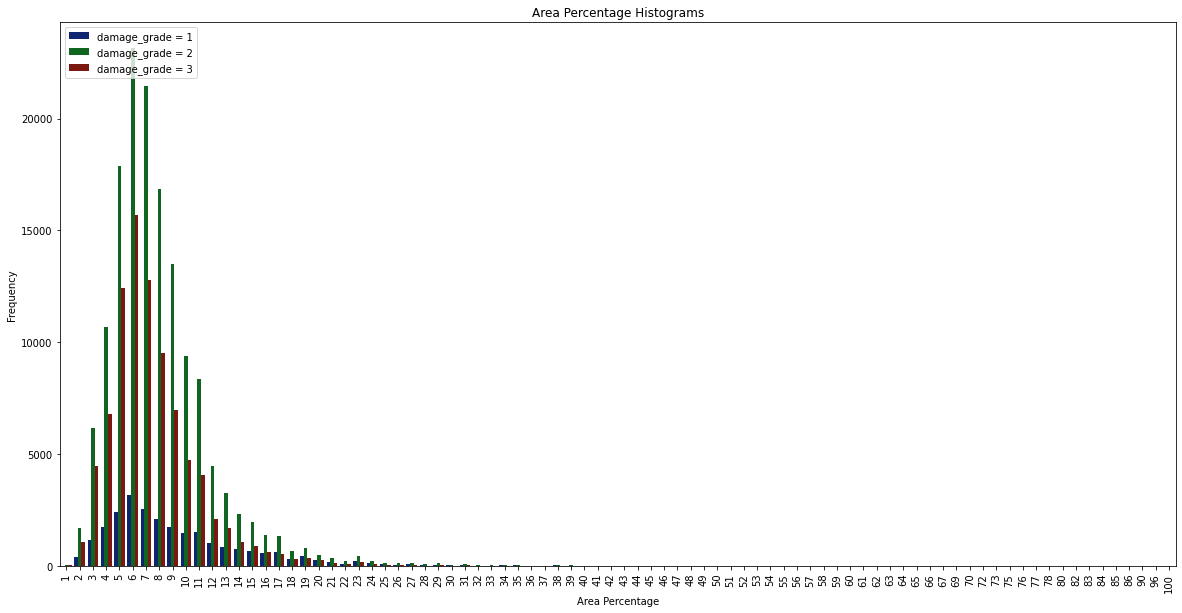

In [ ]:
# will need to take care of outliers
plt.figure(figsize=(20,10))
sns.countplot(x=training_merge["area_percentage"],hue=training_merge["damage_grade"]);
plt.ylabel("Frequency");
plt.xlabel("Area Percentage");
plt.xticks(rotation=90);
plt.title("Area Percentage Histograms");
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"]);
plt.show();

In [ ]:
training_merge['area_percentage'] = training_merge['area_percentage'] / 100

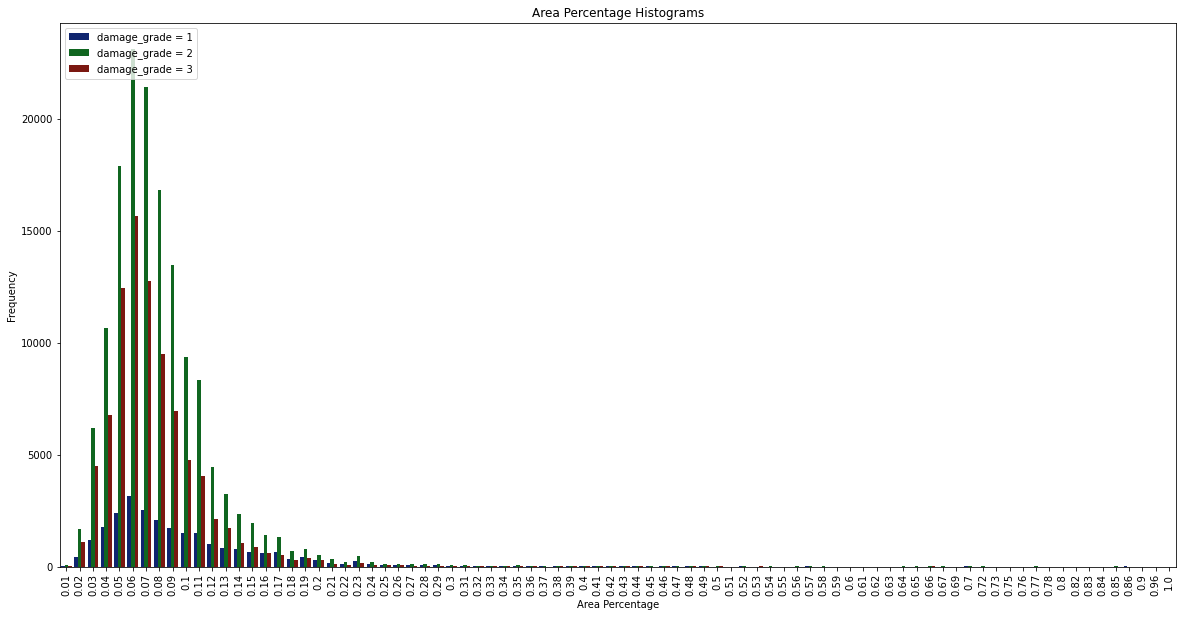

In [ ]:
# will need to take care of outliers
plt.figure(figsize=(20,10))
sns.countplot(x=training_merge["area_percentage"],hue=training_merge["damage_grade"]);
plt.ylabel("Frequency");
plt.xlabel("Area Percentage");
plt.xticks(rotation=90);
plt.title("Area Percentage Histograms");
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"]);
plt.show();

In [ ]:
train_data['area_percentage'] = train_data['area_percentage'] / 100

In [ ]:
train_data.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,...,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,geo_feat1,geo_feat2,geo_feat3,geo_feat4,geo_feat5,geo_feat6,geo_feat7,geo_feat8,geo_feat9,geo_feat10,geo_feat11,geo_feat12,geo_feat13,geo_feat14,geo_feat15,geo_feat16
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,2,1,0.06,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.713477,-1.685749,-1.194371,2.408162,0.215208,-1.325237,-2.592249,-0.067111,0.658350,0.964602,-1.276430,1.157120,-2.049538,-1.843554,1.354692,-0.590274
28830,2,0,0.08,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.311378,-1.488049,-0.145316,0.842827,-0.709803,-1.263341,-1.929573,1.120080,0.191057,1.758695,-1.552979,-1.307747,-1.636067,-0.559708,0.878221,-0.211915
94947,2,0,0.05,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.501885,-1.405468,-1.775655,1.450704,-0.642247,-2.446310,0.938528,-0.374810,-1.954872,-0.765810,-2.463618,-1.697670,-1.982338,-1.335037,1.747809,-0.799202
590882,2,0,0.06,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.070153,0.202311,-2.107500,1.419313,-1.268123,-0.133942,-2.257814,0.861477,-1.968472,1.635222,0.358740,-0.218387,-1.695522,-2.057333,0.506888,-1.211981
201944,3,1,0.08,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.227016,0.134693,-1.647378,2.225381,-1.263988,-2.644835,0.787446,-0.299297,-1.737736,2.293003,-1.519499,0.510824,-0.183931,-2.308106,1.972746,-1.442366


***Testing data FE***

In [ ]:
# test_copy = test_data
# test_copy.head()

In [ ]:
test_data['area_percentage'] = test_data['area_percentage'] / 100

In [ ]:
test_data.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,...,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,geo_feat1,geo_feat2,geo_feat3,geo_feat4,geo_feat5,geo_feat6,geo_feat7,geo_feat8,geo_feat9,geo_feat10,geo_feat11,geo_feat12,geo_feat13,geo_feat14,geo_feat15,geo_feat16
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300051,3,1,0.07,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.178487,-1.174753,-0.519281,1.139457,-0.497142,-2.268867,0.009943,-0.742669,0.019291,1.415935,-0.724983,-1.164149,-0.652515,0.092306,0.537613,-1.243240
99355,2,1,0.13,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.308037,-1.629814,-1.594685,0.734262,0.739033,-0.678886,-1.084093,0.462104,-0.091534,0.054924,-1.776470,-0.378427,-1.028641,-1.427612,0.774286,-0.558690
890251,2,0,0.04,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-0.229437,-0.308185,-1.173216,0.463355,-0.883243,-0.681270,-1.571340,0.182869,-1.444597,1.457899,-0.318530,0.213304,-0.615155,-1.458455,-0.154438,-0.115178
745817,1,0,0.19,3,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-2.131380,-2.538512,-0.067039,-0.130441,-1.162298,-2.971518,-1.316206,-2.259534,-1.623259,2.967144,-1.663971,-0.500975,-2.782735,-1.430148,-1.786694,-1.264018
421793,3,0,0.08,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-0.908015,-1.129179,-0.531318,1.829534,-0.896296,-2.257983,0.242262,-0.621322,-0.504734,1.658621,-0.004866,-1.175617,0.233338,-0.349680,0.767912,-0.528235


# ***Height_Percentage Feature Engineering***

***Training Data FE***

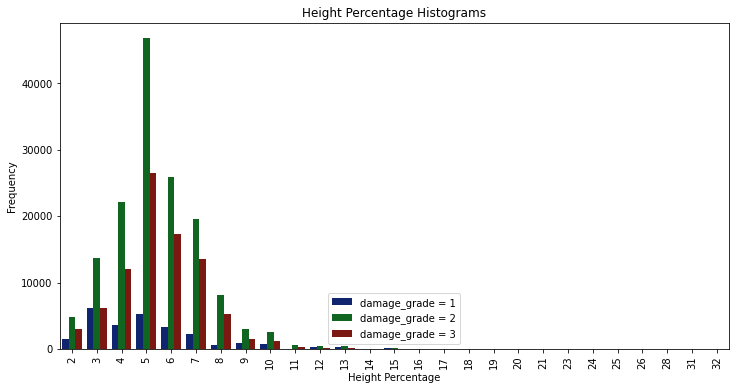

In [ ]:
# will need to take care of outliers
plt.figure(figsize=(12,6))
sns.countplot(x=training_merge["height_percentage"],hue=training_merge["damage_grade"]);
plt.ylabel("Frequency");
plt.xlabel("Height Percentage");
plt.xticks(rotation=90);
plt.title("Height Percentage Histograms");
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"]);
plt.show();

In [ ]:
training_merge['height_percentage'] = training_merge['height_percentage'] / 100

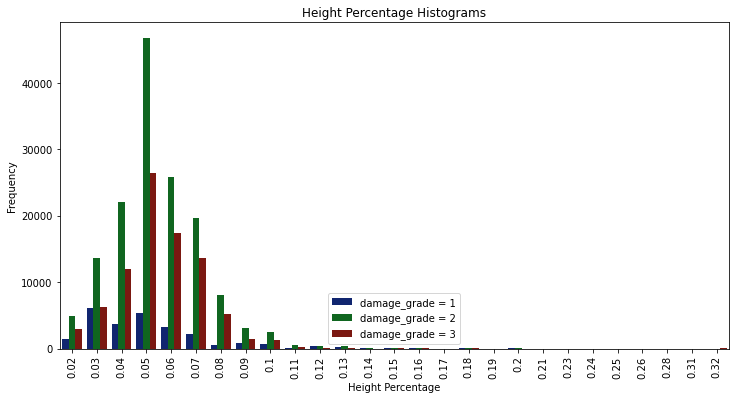

In [ ]:
# will need to take care of outliers
plt.figure(figsize=(12,6))
sns.countplot(x=training_merge["height_percentage"],hue=training_merge["damage_grade"]);
plt.ylabel("Frequency");
plt.xlabel("Height Percentage");
plt.xticks(rotation=90);
plt.title("Height Percentage Histograms");
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"]);
plt.show();

In [ ]:
train_data['height_percentage'] = train_data['height_percentage'] / 100

In [ ]:
train_data.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,...,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,geo_feat1,geo_feat2,geo_feat3,geo_feat4,geo_feat5,geo_feat6,geo_feat7,geo_feat8,geo_feat9,geo_feat10,geo_feat11,geo_feat12,geo_feat13,geo_feat14,geo_feat15,geo_feat16
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,2,1,0.06,0.05,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.713477,-1.685749,-1.194371,2.408162,0.215208,-1.325237,-2.592249,-0.067111,0.658350,0.964602,-1.276430,1.157120,-2.049538,-1.843554,1.354692,-0.590274
28830,2,0,0.08,0.07,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.311378,-1.488049,-0.145316,0.842827,-0.709803,-1.263341,-1.929573,1.120080,0.191057,1.758695,-1.552979,-1.307747,-1.636067,-0.559708,0.878221,-0.211915
94947,2,0,0.05,0.05,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.501885,-1.405468,-1.775655,1.450704,-0.642247,-2.446310,0.938528,-0.374810,-1.954872,-0.765810,-2.463618,-1.697670,-1.982338,-1.335037,1.747809,-0.799202
590882,2,0,0.06,0.05,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.070153,0.202311,-2.107500,1.419313,-1.268123,-0.133942,-2.257814,0.861477,-1.968472,1.635222,0.358740,-0.218387,-1.695522,-2.057333,0.506888,-1.211981
201944,3,1,0.08,0.09,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.227016,0.134693,-1.647378,2.225381,-1.263988,-2.644835,0.787446,-0.299297,-1.737736,2.293003,-1.519499,0.510824,-0.183931,-2.308106,1.972746,-1.442366


***Testing Data FE***

In [ ]:
test_data['height_percentage'] = test_data['height_percentage'] / 100

In [ ]:
test_data.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,...,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,geo_feat1,geo_feat2,geo_feat3,geo_feat4,geo_feat5,geo_feat6,geo_feat7,geo_feat8,geo_feat9,geo_feat10,geo_feat11,geo_feat12,geo_feat13,geo_feat14,geo_feat15,geo_feat16
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300051,3,1,0.07,0.06,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.178487,-1.174753,-0.519281,1.139457,-0.497142,-2.268867,0.009943,-0.742669,0.019291,1.415935,-0.724983,-1.164149,-0.652515,0.092306,0.537613,-1.243240
99355,2,1,0.13,0.05,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.308037,-1.629814,-1.594685,0.734262,0.739033,-0.678886,-1.084093,0.462104,-0.091534,0.054924,-1.776470,-0.378427,-1.028641,-1.427612,0.774286,-0.558690
890251,2,0,0.04,0.05,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-0.229437,-0.308185,-1.173216,0.463355,-0.883243,-0.681270,-1.571340,0.182869,-1.444597,1.457899,-0.318530,0.213304,-0.615155,-1.458455,-0.154438,-0.115178
745817,1,0,0.19,0.03,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-2.131380,-2.538512,-0.067039,-0.130441,-1.162298,-2.971518,-1.316206,-2.259534,-1.623259,2.967144,-1.663971,-0.500975,-2.782735,-1.430148,-1.786694,-1.264018
421793,3,0,0.08,0.07,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-0.908015,-1.129179,-0.531318,1.829534,-0.896296,-2.257983,0.242262,-0.621322,-0.504734,1.658621,-0.004866,-1.175617,0.233338,-0.349680,0.767912,-0.528235


# **Split Data for Further FE**

In [ ]:
# train_data    AKA training_x
# test_data     AKA test_value

In [ ]:
X = train_data
y = training_y
X_train,X_cvalid,y_train,y_cvalid = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 42)

In [ ]:
cd '/content/drive/MyDrive/Project Data'

/content/drive/MyDrive/Project Data


In [ ]:
pwd

'/content/drive/MyDrive/Project Data'

In [ ]:
X_train.to_csv("X_train.csv")
X_cvalid.to_csv("X_cvalid.csv")
y_train.to_csv("y_train.csv")
y_cvalid.to_csv("y_cvalid.csv")
test_data.to_csv("test_data.csv")

# **Y Imbalance Handling**

In [ ]:
# from imblearn.over_sampling import SMOTE

In [ ]:
# y_train = pd.read_csv('/content/drive/MyDrive/Project Data/y_train.csv')
# y_train = y_train.set_index('building_id')

In [ ]:
# X_train, y_train = SMOTE(random_state=0).fit_resample(X_train, y_train)

In [ ]:
# X_train.shape

In [ ]:
# y_train.shape

In [ ]:
# unique, counts = np.unique(y_train, return_counts=True)

In [ ]:
# unique

In [ ]:
# counts

In [ ]:
# y_train.head()

In [ ]:
# evals_d = []
# evals_d.append(quick_evaluation_with_dt(x_resampled, X_cvalid, y_resampled,y_cvalid, 'Over SMOTE'))

# **Models**

***Model 1 - Random Forest Model with Default Parameters***

In [ ]:
# Fitting Random Forest Classification to the Training set with default parameters
model_rf_01 = RandomForestClassifier(class_weight='balanced')
model_rf_01.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [ ]:
y_predict_01 = model_rf_01.predict(X_cvalid)
print("Accuracy :",metrics.accuracy_score(y_predict_01,y_cvalid))

Accuracy : 0.7245831814431803


In [ ]:
#Classification metrics
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_cvalid,y_predict_01))

              precision    recall  f1-score   support

           1       0.61      0.55      0.58      5025
           2       0.75      0.79      0.77     29652
           3       0.71      0.66      0.68     17444

    accuracy                           0.72     52121
   macro avg       0.69      0.67      0.68     52121
weighted avg       0.72      0.72      0.72     52121



Text(123.05999999999997, 0.5, 'predicted class')

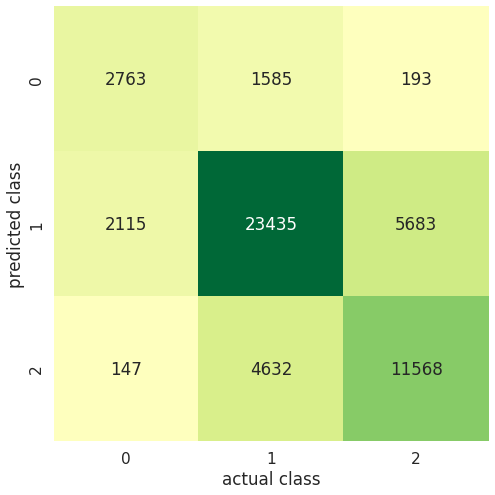

In [ ]:
#confusion matrix for default RF
mat = confusion_matrix(y_cvalid,y_predict_01)
figure1 = plt.figure(figsize=[10,8])
sns.set(font_scale=1.4)
sns.heatmap(mat.T, square=True,annot=True,fmt='d',cbar=False,cmap='RdYlGn',center = 0.117)
plt.xlabel('actual class')
plt.ylabel('predicted class')

In [ ]:
#print the AUC - ROC Score
roc_auc_value = roc_auc_score(y_cvalid,model_rf_01.predict_proba(X_cvalid),multi_class='ovr')
roc_auc_value

0.8584921656449974

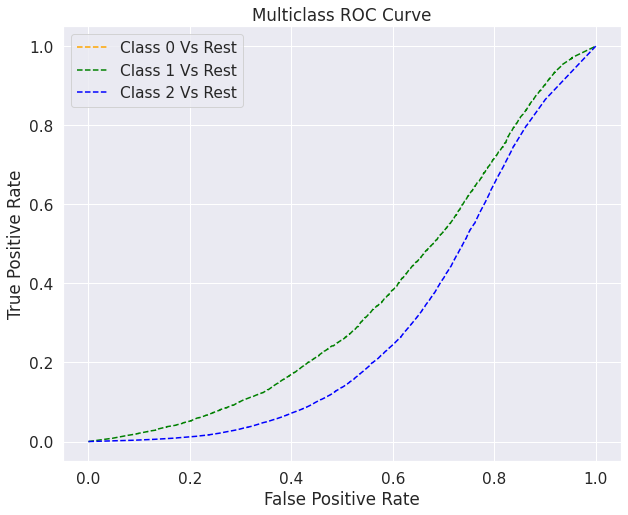

In [ ]:
#Plot the ROC Curve
#y_prob_01 = model_rf_01.predict_proba(X_test)
fpr = {}
tpr = {}
thresh = {}
n_classes = 3
for i in range(n_classes):
    fpr[i],tpr[i],thresh[i] = roc_curve(y_cvalid,model_rf_01.predict_proba(X_cvalid)[:,i],pos_label = i)

#PLOT
figure1 = plt.figure(figsize=[10,8]);
plt.plot(fpr[0],tpr[0], linestyle='--', color='orange', label='Class 0 Vs Rest');
plt.plot(fpr[1],tpr[1], linestyle='--', color='green', label='Class 1 Vs Rest');
plt.plot(fpr[2],tpr[2], linestyle='--', color='blue', label='Class 2 Vs Rest');
plt.title('Multiclass ROC Curve');
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.legend(loc='best');

In [ ]:
# display all columns
# pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
#Show Key Features

feature_imp_01 = pd.Series(model_rf_01.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp_01

area_percentage                           0.094969
age                                       0.046197
geo_feat4                                 0.040095
geo_feat10                                0.039541
has_superstructure_mud_mortar_stone       0.038552
height_percentage                         0.037858
foundation_type_r                         0.036842
geo_feat1                                 0.030319
geo_feat6                                 0.030044
geo_feat5                                 0.029971
geo_feat2                                 0.028978
geo_feat3                                 0.028807
geo_feat9                                 0.028687
geo_feat16                                0.028589
geo_feat15                                0.028342
geo_feat12                                0.028070
geo_feat8                                 0.026695
geo_feat13                                0.026546
geo_feat7                                 0.026181
geo_feat11                     

In [ ]:
pd.set_option('display.max_rows',60)

In [ ]:
y_predict_01 = model_rf_01.predict(test_data)

y_predict_01

array([2, 2, 2, ..., 2, 2, 1])

In [ ]:
test_building_id = test_value.index.tolist()
len(test_building_id)

86868

In [ ]:
submission = pd.DataFrame()
submission["building_id"] = test_building_id
submission["damage_grade"] = y_predict_01
submission.head()

,building_id,damage_grade
0,300051,2
1,99355,2
2,890251,2
3,745817,2
4,421793,3


In [ ]:
submission.to_csv("submission.csv", index=False)

***Model 2 - Random Forest Model with some Hyper Parameters***

In [ ]:
# #Fit the Model with HyperParameters
# from sklearn.ensemble import RandomForestClassifier
# model_rf_02 = RandomForestClassifier(bootstrap=True,ccp_alpha=0.0, class_weight=None,n_estimators = 10000, 
#                                      criterion='gini',max_depth=None,max_features = "sqrt", max_leaf_nodes=None, 
#                                      max_samples=None,min_impurity_decrease=0.0, min_impurity_split=None,
#                                      min_samples_leaf= 4,min_samples_split=2,n_jobs = 5,min_weight_fraction_leaf=0.0,
#                                      random_state = 42)
# model_rf_02.fit(X_train,y_train)

In [ ]:
# #Fit the Model with HyperParameters
# from sklearn.ensemble import RandomForestClassifier
# model_rf_02 = RandomForestClassifier(criterion='gini', max_depth=5, min_samples_split=5,
#                                      min_samples_leaf=1, max_features='auto',
#                                       max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, 
#                                      n_jobs=None, random_state=0,verbose=0, warm_start=False, class_weight=None, 
#                                      ccp_alpha=0.0, max_samples=None)
# model_rf_02.fit(x_train,y_train)

***Light GBM (Best)***

In [ ]:
y = np.array(training_y['damage_grade'])-1
y

array([2, 1, 2, ..., 2, 1, 2])

In [ ]:
x = np.array(train_data)
x

array([[ 2.        ,  1.        ,  0.06      , ..., -1.84355366,
         1.35469198, -0.59027445],
       [ 2.        ,  0.        ,  0.08      , ..., -0.55970848,
         0.87822098, -0.21191499],
       [ 2.        ,  0.        ,  0.05      , ..., -1.33503735,
         1.74780869, -0.79920167],
       ...,
       [ 3.        ,  2.        ,  0.06      , ..., -1.15631938,
         1.12012911, -1.2710458 ],
       [ 2.        ,  0.        ,  0.14      , ..., -1.28973627,
        -1.63060367, -1.12711287],
       [ 3.        ,  0.        ,  0.07      , ..., -1.22288203,
         1.53475463, -0.63993269]])

In [ ]:
SEED = 1881

In [ ]:
def threshold_arr(array):
    # Get major confidence-scored predicted value.
    new_arr = []
    for ix, val in enumerate(array):
        loc = np.array(val).argmax(axis=0)
        k = list(np.zeros((len(val))))
        k[loc]=1
        new_arr.append(k)
        
    return np.array(new_arr)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=SEED)
for ix, (train_index, test_index) in enumerate(kf.split(x)):
    lgb_params = {
        "objective" : "multiclass",
        "num_class":3,
        "metric" : "multi_error",
        "boosting": 'gbdt',
        "max_depth" : -1,
        "num_leaves" : 30,
        "learning_rate" : 0.1,
        "feature_fraction" : 0.5,
        "min_sum_hessian_in_leaf" : 0.1,
        "max_bin":8192,
        "verbosity" : 1,
        "num_threads":6,
        "seed": SEED
    }

    x_train, x_val, y_train, y_val= x[train_index], x[test_index], y[train_index], y[test_index]

    train_data = lgb.Dataset(x_train, label=y_train)
    val_data   = lgb.Dataset(x_val, label=y_val)

    lgb_clf = lgb.train(lgb_params,
                        train_data,
                        20000,
                        valid_sets = [val_data],
                        early_stopping_rounds=3000,
                        verbose_eval = 1000)

    y_pred = lgb_clf.predict(x_val)
    print("F1-MICRO SCORE: ", f1_score(np.array(pd.get_dummies(y_val)), threshold_arr(y_pred), average='micro'))
    lgb_clf.save_model(f'model{ix}.txt')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.177808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 122438
[LightGBM] [Info] Number of data points in the train set: 208480, number of used features: 81
[LightGBM] [Info] Start training from score -2.333567
[LightGBM] [Info] Start training from score -0.564567
[LightGBM] [Info] Start training from score -1.095284
Training until validation scores don't improve for 3000 rounds
[1000]	valid_0's multi_error: 0.247885
[2000]	valid_0's multi_error: 0.248134
[3000]	valid_0's multi_error: 0.249535
[4000]	valid_0's multi_error: 0.250763
Early stopping, best iteration is:
[1525]	valid_0's multi_error: 0.247194
F1-MICRO SCORE:  0.752805970721974
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.166706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 122391
[LightGBM] [In

In [ ]:
lgb_clf.save_model(f'model{ix}.txt')

In [ ]:
threshold_arr(y_pred)

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
#Create Submission File
# Load all LightGB Models and concatenate.
models = []
for i in range(5):
    model = lgb.Booster(model_file=f'model{i}.txt')

    y_pred = model.predict(x)
    score  = f1_score(np.array(pd.get_dummies(y)), threshold_arr(y_pred), average='micro')
    print("F1-MICRO SCORE: ", score)
    models.append(model)

F1-MICRO SCORE:  0.8037152581916416
F1-MICRO SCORE:  0.796735238928477
F1-MICRO SCORE:  0.7928288840027475
F1-MICRO SCORE:  0.8162593389894897
F1-MICRO SCORE:  0.819156488271342


In [ ]:
def ensemble(models, x):
    # Ensemble K-Fold CV models with adding all confidence score by class.
    y_preds = []
    
    for model in models:
        y_pred = model.predict(x)
        y_preds.append(y_pred)
        
    init_y_pred = y_preds[0]
    for ypred in y_preds[1:]:
        init_y_pred += ypred
        
    y_pred = threshold_arr(init_y_pred)
    
    return y_pred

In [ ]:
x = np.array(test_data)

In [ ]:
y_pred = ensemble(models, x)
y_pred = y_pred.argmax(axis=1)+1

In [ ]:
y_pred

array([3, 2, 2, ..., 2, 2, 1])

In [ ]:
test_building_id = test_data.index.tolist()

In [ ]:
sub_csv = pd.DataFrame(columns=["building_id", "damage_grade"])
sub_csv["building_id"] = test_building_id
sub_csv["damage_grade"] = y_pred
sub_csv.to_csv("submission_LGBM.csv", index=False)

***Neural Network Test***

In [ ]:
y_train -= 1
y_cvalid -= 1


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
# class Metrics(Callback):

#     def on_train_begin(self, logs={}):
#         self.val_f1s = []
#         self.val_recalls = []
#         self.val_precisions = []

#     def on_epoch_end(self, epoch, logs={}):
#         val_predict = (np.asarray(self.model.predict(
#             self.model.validation_data[0]))).round()
#         val_targ = self.model.validation_data[1]
#         _val_f1 = f1_score(val_targ, val_predict)
#         _val_recall = recall_score(val_targ, val_predict)
#         _val_precision = precision_score(val_targ, val_predict)
#         self.val_f1s.append(_val_f1)
#         self.val_recalls.append(_val_recall)
#         self.val_precisions.append(_val_precision)
#         print(f" — val_f1: {_val_f1} — val_precision: {_val_precision} — val_recall _val_recall")
#         return


# metrics = Metrics()

In [ ]:
X_train.shape

(208480, 81)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Input(shape=[81]),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 120)               9840      
                                                                 
 dense_5 (Dense)             (None, 60)                7260      
                                                                 
 dense_6 (Dense)             (None, 15)                915       
                                                                 
 dense_7 (Dense)             (None, 3)                 48        
                                                                 
Total params: 18,063
Trainable params: 18,063
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
first_train = model.fit(X_train, y_train, epochs=20,
                        validation_data=(X_cvalid, y_cvalid))

Epoch 1/20
6515/6515 [==============================] - 16s 2ms/step - loss: 0.6896 - accuracy: 0.6811 - val_loss: 0.6483 - val_accuracy: 0.7076
Epoch 2/20
6515/6515 [==============================] - 15s 2ms/step - loss: 0.6473 - accuracy: 0.7051 - val_loss: 0.6357 - val_accuracy: 0.7096
Epoch 3/20
6515/6515 [==============================] - 16s 2ms/step - loss: 0.6327 - accuracy: 0.7113 - val_loss: 0.6358 - val_accuracy: 0.7099
Epoch 4/20
6515/6515 [==============================] - 16s 2ms/step - loss: 0.6238 - accuracy: 0.7157 - val_loss: 0.6270 - val_accuracy: 0.7177
Epoch 5/20
6515/6515 [==============================] - 16s 2ms/step - loss: 0.6166 - accuracy: 0.7207 - val_loss: 0.6228 - val_accuracy: 0.7165
Epoch 6/20
6515/6515 [==============================] - 15s 2ms/step - loss: 0.6115 - accuracy: 0.7224 - val_loss: 0.6196 - val_accuracy: 0.7213
Epoch 7/20
6515/6515 [==============================] - 16s 2ms/step - loss: 0.6070 - accuracy: 0.7252 - val_loss: 0.6155 - val_ac

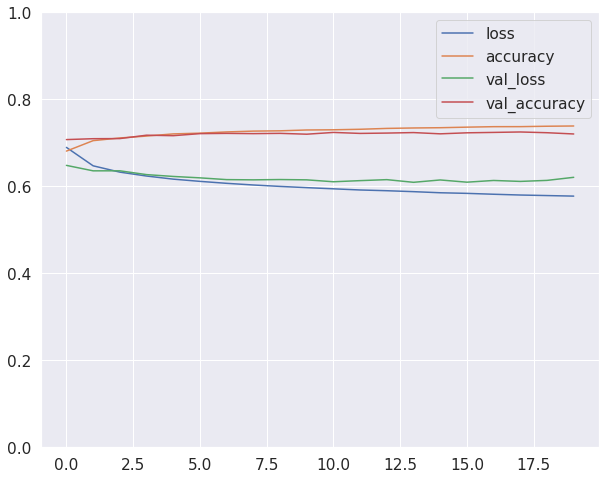

In [ ]:
pd.DataFrame(first_train.history).plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
#predict on the test dataset
y_predict = model.predict(test_data)
y_predict = np.argmax(y_predict, axis=1)
y_predict
# print("Accuracy :",metrics.accuracy_score(y_test,y_predict))

array([2, 1, 1, ..., 1, 1, 1])

In [ ]:
y_predict += 1
np.unique(y_predict)
#y_predict.value_counts

array([1, 2, 3])

In [ ]:
prediction = pd.DataFrame(y_predict)
prediction.shape

(86868, 1)

In [ ]:
test_building_id = test_value.index.tolist()
len(test_building_id)

86868

In [ ]:
submission["building_id"] = test_building_id
submission["damage_grade"] = y_predict
submission.head()

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,2
4,421793,3


In [ ]:
submission.to_csv("submission.csv", index=False)

In [ ]:
# prediction.index = test_index
# prediction

In [ ]:
# prediction.to_csv('prediction.csv')

***NN Tuning***

In [ ]:
#create a function given a set of hyperparameters

def build_model(n_hidden=3, n_neurons=[160,80,30], learning_rate=3e-3, input_shape=[81]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for Layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons[Layer], activation="relu"))
  model.add(keras.layers.Dense(3, activation='softmax'))
  optimizer=keras.optimizers.SGD(lr=learning_rate)
  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
# model = keras.models.Sequential([
#     keras.layers.Input(shape=[81]),
#     keras.layers.Dense(120, activation='relu'),
#     keras.layers.Dense(60, activation='relu'),
#     keras.layers.Dense(15, activation='relu'),
#     keras.layers.Dense(3, activation='softmax')
# ])

# model.compile(loss="sparse_categorical_crossentropy",
#               optimizer="adam",
#               metrics=["accuracy"])

# first_train = model.fit(X_train, y_train, epochs=20,
#                         validation_data=(X_cvalid, y_cvalid))

In [ ]:
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [ ]:
test_model=build_model()
test_model.summary()

Model: "sequential_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_278 (Dense)           (None, 160)               13120     
                                                                 
 dense_279 (Dense)           (None, 80)                12880     
                                                                 
 dense_280 (Dense)           (None, 30)                2430      
                                                                 
 dense_281 (Dense)           (None, 3)                 93        
                                                                 
Total params: 28,523
Trainable params: 28,523
Non-trainable params: 0
_________________________________________________________________


In [ ]:
keras_clf.fit(X_train,y_train, epochs=10,
              validation_data=(X_cvalid,y_cvalid),
              callbacks=[keras.callbacks.EarlyStopping(patience=3)])
   

Epoch 1/10
6515/6515 [==============================] - 14s 2ms/step - loss: 0.7814 - accuracy: 0.6285 - val_loss: 0.7288 - val_accuracy: 0.6590
Epoch 2/10
6515/6515 [==============================] - 13s 2ms/step - loss: 0.7220 - accuracy: 0.6646 - val_loss: 0.7060 - val_accuracy: 0.6739
Epoch 3/10
6515/6515 [==============================] - 14s 2ms/step - loss: 0.7029 - accuracy: 0.6757 - val_loss: 0.6900 - val_accuracy: 0.6837
Epoch 4/10
6515/6515 [==============================] - 13s 2ms/step - loss: 0.6898 - accuracy: 0.6846 - val_loss: 0.6803 - val_accuracy: 0.6902
Epoch 5/10
6515/6515 [==============================] - 13s 2ms/step - loss: 0.6802 - accuracy: 0.6895 - val_loss: 0.6723 - val_accuracy: 0.6969
Epoch 6/10
6515/6515 [==============================] - 14s 2ms/step - loss: 0.6724 - accuracy: 0.6944 - val_loss: 0.6690 - val_accuracy: 0.6941
Epoch 7/10
6515/6515 [==============================] - 13s 2ms/step - loss: 0.6662 - accuracy: 0.6979 - val_loss: 0.6582 - val_ac

In [ ]:
from scipy.stats import  reciprocal
from sklearn.model_selection import  RandomizedSearchCV

In [ ]:
param_distribs= {
    'n_hidden':[0,1,2,3],
    'n_neurons': np.arange(1,100),
    'learning_rate': reciprocal(3e-4, 3e-2),
}

rnd_search_cv= RandomizedSearchCV(keras_clf, param_distribs, n_iter=10,cv=3)
rnd_search_cv.fit(X_train,y_train, epochs=10,
                  validation_data=(X_cvalid,y_cvalid))



Epoch 1/10
4344/4344 [==============================] - 9s 2ms/step - loss: 0.7721 - accuracy: 0.6317 - val_loss: 0.7501 - val_accuracy: 0.6412
Epoch 2/10
4344/4344 [==============================] - 9s 2ms/step - loss: 0.7557 - accuracy: 0.6382 - val_loss: 0.7463 - val_accuracy: 0.6409
Epoch 3/10
4344/4344 [==============================] - 9s 2ms/step - loss: 0.7537 - accuracy: 0.6387 - val_loss: 0.7455 - val_accuracy: 0.6408
Epoch 4/10
4344/4344 [==============================] - 8s 2ms/step - loss: 0.7528 - accuracy: 0.6383 - val_loss: 0.7448 - val_accuracy: 0.6436
Epoch 5/10
4344/4344 [==============================] - 8s 2ms/step - loss: 0.7521 - accuracy: 0.6387 - val_loss: 0.7573 - val_accuracy: 0.6382
Epoch 6/10
4344/4344 [==============================] - 8s 2ms/step - loss: 0.7516 - accuracy: 0.6401 - val_loss: 0.7436 - val_accuracy: 0.6433
Epoch 7/10
4344/4344 [==============================] - 8s 2ms/step - loss: 0.7516 - accuracy: 0.6399 - val_loss: 0.7429 - val_accuracy:

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f45b75976d0>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f45d4962c50>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [ ]:
rnd_search_cv.best_params_

{'learning_rate': 0.002943239051903049, 'n_hidden': 0, 'n_neurons': 54}

In [ ]:
# X_train,X_cvalid,y_train,y_cvalid

In [ ]:
# Create function
def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    def nn_cl_fun():
        opt = Adam(lr = learning_rate)
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=10, activation=activation))
        nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size,
                         verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [ ]:
# Set paramaters

params_nn ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

ModuleNotFoundError: ignored

# ***Standardization for Training Data***

In [ ]:
# fig, axes = plt.subplots(ncols = 3, figsize = (20, 5))
# sns.distplot(x=training_merge['geo_level_1_id'], rug=True, ax = axes[0]);
# sns.distplot(x=training_merge['geo_level_2_id'], rug=True, ax = axes[1]);
# sns.distplot(x=training_merge['geo_level_3_id'], rug=True, ax = axes[2]);
# #May need normalize

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(training_merge[['geo_level_1_id']])
# training_merge['geo_level_1_id'] = scaler.transform(training_merge[['geo_level_1_id']])

# scaler = StandardScaler()
# scaler.fit(training_merge[['geo_level_2_id']])
# training_merge['geo_level_2_id'] = scaler.transform(training_merge[['geo_level_2_id']])

# scaler = StandardScaler()
# scaler.fit(training_merge[['geo_level_3_id']])
# training_merge['geo_level_3_id'] = scaler.transform(training_merge[['geo_level_3_id']])

In [ ]:
# fig, axes = plt.subplots(ncols = 3, figsize = (20, 5))
# sns.distplot(x=training_merge['geo_level_1_id'], rug=True, ax = axes[0]);
# sns.distplot(x=training_merge['geo_level_2_id'], rug=True, ax = axes[1]);
# sns.distplot(x=training_merge['geo_level_3_id'], rug=True, ax = axes[2]);
# #May need normalize

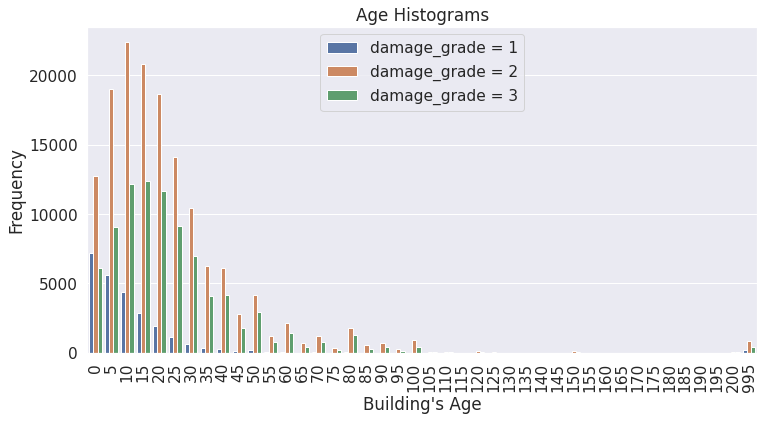

In [ ]:
# will need to take care of outliers
plt.figure(figsize=(12,6))
sns.countplot(x=training_merge["age"],hue=training_merge["damage_grade"]);
plt.ylabel("Frequency");
plt.xlabel("Building's Age");
plt.xticks(rotation=90);
plt.title("Age Histograms");
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"]);
plt.show();

In [ ]:
# scaler = StandardScaler()
# scaler.fit(training_merge[['age']])
# training_merge['age'] = scaler.transform(training_merge[['age']])

In [ ]:
# will need to take care of outliers
plt.figure(figsize=(12,6))
sns.countplot(x=training_merge["age"],hue=training_merge["damage_grade"]);
plt.ylabel("Frequency");
plt.xlabel("Building's Age");
plt.xticks(rotation=90);
plt.title("Age Histograms");
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"]);
plt.show();

NameError: ignored

# ***Standardization for Testing Data***

In [ ]:
# fig, axes = plt.subplots(ncols = 3, figsize = (20, 5))
# sns.distplot(x=test_value['geo_level_1_id'], rug=True, ax = axes[0]);
# sns.distplot(x=test_value['geo_level_2_id'], rug=True, ax = axes[1]);
# sns.distplot(x=test_value['geo_level_3_id'], rug=True, ax = axes[2]);
# #May need normalize

In [ ]:
# scaler = StandardScaler()
# scaler.fit(test_value[['geo_level_1_id']])
# test_value['geo_level_1_id'] = scaler.transform(test_value[['geo_level_1_id']])

# scaler = StandardScaler()
# scaler.fit(test_value[['geo_level_2_id']])
# test_value['geo_level_2_id'] = scaler.transform(test_value[['geo_level_2_id']])

# scaler = StandardScaler()
# scaler.fit(test_value[['geo_level_3_id']])
# test_value['geo_level_3_id'] = scaler.transform(test_value[['geo_level_3_id']])

In [ ]:
# fig, axes = plt.subplots(ncols = 3, figsize = (20, 5))
# sns.distplot(x=test_value['geo_level_1_id'], rug=True, ax = axes[0]);
# sns.distplot(x=test_value['geo_level_2_id'], rug=True, ax = axes[1]);
# sns.distplot(x=test_value['geo_level_3_id'], rug=True, ax = axes[2]);

# **Outliers**

***-height_percentage***

In [ ]:
'''
#Data source
name = "height_percentage"
data = training_merge[name]

#Before winsorization
plt.figure(figsize=(8,6))
sns.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()
'''

'\n#Data source\nname = "height_percentage"\ndata = training_merge[name]\n\n#Before winsorization\nplt.figure(figsize=(8,6))\nsns.boxplot(data)\nplt.title("{} Before Winsorization".format(name))\nplt.show()\n'

In [ ]:
# #Winsorization
# winsorized_data = winsorize(data,(0, 0.04))

# #After winsorization
# plt.figure(figsize=(8,6))
# sns.boxplot(winsorized_data)
# plt.title("{} After Winsorization".format(name))
# plt.show()

# #Replace data in dataset
# training_merge[name] = winsorized_data

In [ ]:
# height_threshold = max(winsorized_data)
# height_threshold

***-area_percentage***

In [ ]:
# #Data source
# name = "area_percentage"
# data = training_merge[name]

# #Before winsorization
# plt.figure(figsize=(8,6))
# sns.boxplot(data)
# plt.title("{} Before Winsorization".format(name))
# plt.show()

In [ ]:
# #Winsorization
# winsorized_data = winsorize(data,(0, 0.055))

# #After winsorization
# plt.figure(figsize=(8,6))
# sns.boxplot(winsorized_data)
# plt.title("{} After Winsorization".format(name))
# plt.show()

# #Replace data in dataset
# training_merge[name] = winsorized_data

In [ ]:
# area_threshold = max(winsorized_data)
# area_threshold